<a href="https://colab.research.google.com/github/ewunder32/visualization_assignment/blob/main/A3_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [12]:
# TYW3NQ Emma Wunderly

#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Q1. Write a function to make a kernel density plot.
def my_kde_plot(data, kernel='gaussian', bandwidth=None, ax=None):
    """
    Creates a kernel density estimate plot for a given dataset.

    Args:
        data (pd.Series or np.array): The data to plot.
        kernel (str, optional): The kernel to use. 'gaussian', 'epanechnikov', or 'uniform'.
                                Defaults to 'gaussian'.
        bandwidth (float, optional): The bandwidth for the kernel. If None,
                                     the Silverman plug-in method is used. Defaults to None.
        ax (matplotlib.axes.Axes, optional): The axes to plot on. Defaults to None.
    """
    if ax is None:
        ax = plt.gca()


    # These functions will define the shape of the kernels.
    def gaussian_kernel(u):
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

    def epanechnikov_kernel(u):
        return 0.75 * (1 - u**2) if np.abs(u) <= 1 else 0

    def uniform_kernel(u):
        return 0.5 if np.abs(u) <= 1 else 0

    # now i map the string input to the correct function.
    kernel_map = {
        'gaussian': gaussian_kernel,
        'epanechnikov': epanechnikov_kernel,
        'uniform': uniform_kernel
    }
    kernel_func = kernel_map.get(kernel.lower())
    if not kernel_func:
        raise ValueError("Invalid kernel. Choose from 'gaussian', 'epanechnikov', 'uniform'.")

    # Bandwidth Calculation will auto-select a sustainable bandwidth
    if bandwidth is None:
        n = len(data)
        std_dev = np.std(data)
        iqr = np.percentile(data, 75) - np.percentile(data, 25)
        # I choose the smaller of the two standard deviation estimates
        A = min(std_dev, iqr / 1.34)
        bandwidth = 0.9 * A * n**(-1/5)
        print(f"Using Silverman plug-in bandwidth: {bandwidth:.4f}")

    # I create a smooth range of x-values to plot the density function
    x_min, x_max = data.min(), data.max()
    x_vals = np.linspace(x_min, x_max, 500)

    # Now, I calculate the KDE; the KDE is the sum of the kernel functions centered at each data point
    kde_values = np.zeros_like(x_vals)
    for x_i in data:
        # Calculate the standardized distance 'u' for each grid point
        u = (x_vals - x_i) / bandwidth
        # Add the kernel's contribution to the total density
        for i, val in enumerate(u):
            kde_values[i] += kernel_func(val)

    # Normalize the total density so the area under the curve is 1
    kde_values /= (len(data) * bandwidth)

    # now plot
    ax.plot(x_vals, kde_values, label=f'Kernel: {kernel.capitalize()}, Bandwidth: {bandwidth:.2f}')
    ax.set_title('Custom Kernel Density Plot')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()


**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

Q2.1: Loading and cleaning data...
Data cleaned. Remaining rows: 3467


Q2.2: Creating histogram of grad_100_value...


Q2.3: Creating KDE plot of grad_100_value...
Comparison: The KDE plot smooths the histogram, revealing a multi-modal distribution, suggesting distinct groups of institutions based on their 100% graduation rates.


Q2.4: Creating grouped histograms...
Grouped statistical descriptions:
Graduation rates by 'level':
          count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

Graduation rates by 'control':
                          count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-f

/tmp/ipython-input-2983614749.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Institution Type')
/tmp/ipython-input-2983614749.py:113: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Institution Type')


Grouped statistical descriptions for `aid_value`:
                                 count          mean          std     min  \
levelXcontrol                                                               
2-year, Private for-profit       460.0   4548.886957  1273.908071   294.0   
2-year, Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
2-year, Public                   926.0   4126.199784  1260.271382   881.0   
4-year, Private for-profit       318.0   4829.050314  1620.406400  2217.0   
4-year, Private not-for-profit  1121.0  15111.199822  7549.163907  1450.0   
4-year, Public                   573.0   6717.588133  2345.658634  2685.0   

                                    25%      50%       75%      max  
levelXcontrol                                                        
2-year, Private for-profit      3814.75   4286.5   5104.25   9727.0  
2-year, Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
2-year, Public                  3311.25   3943.5   47

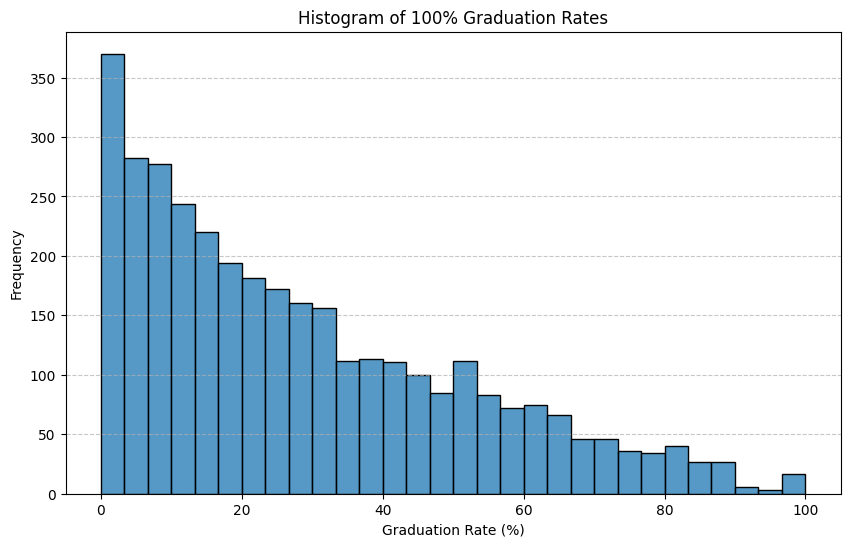

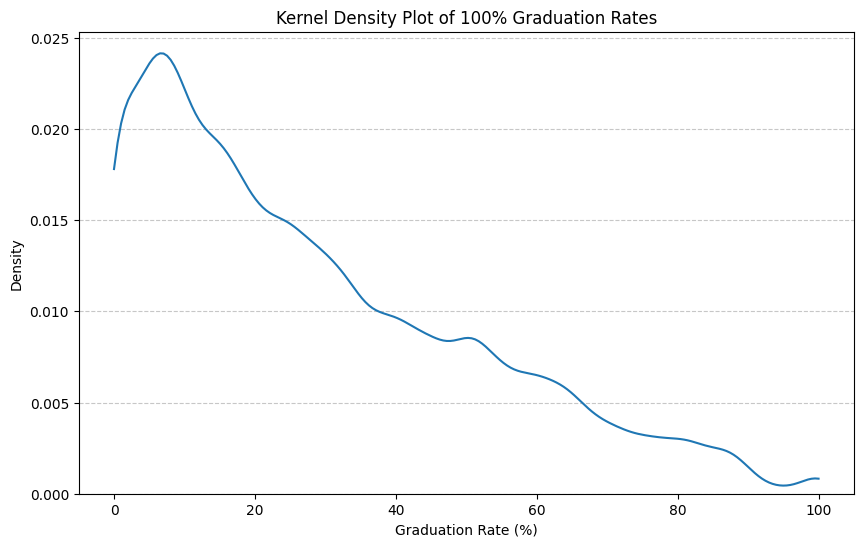

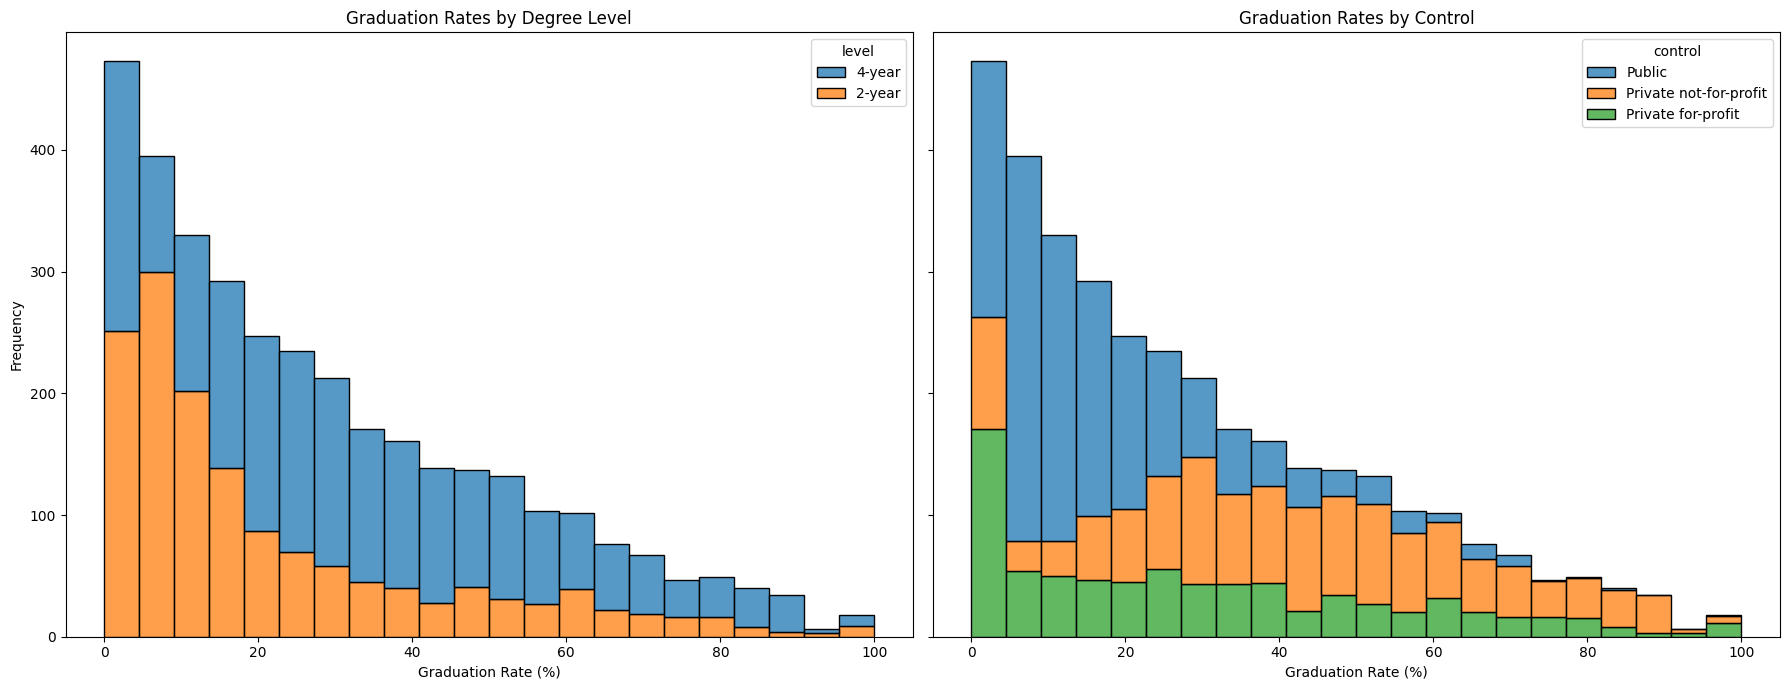

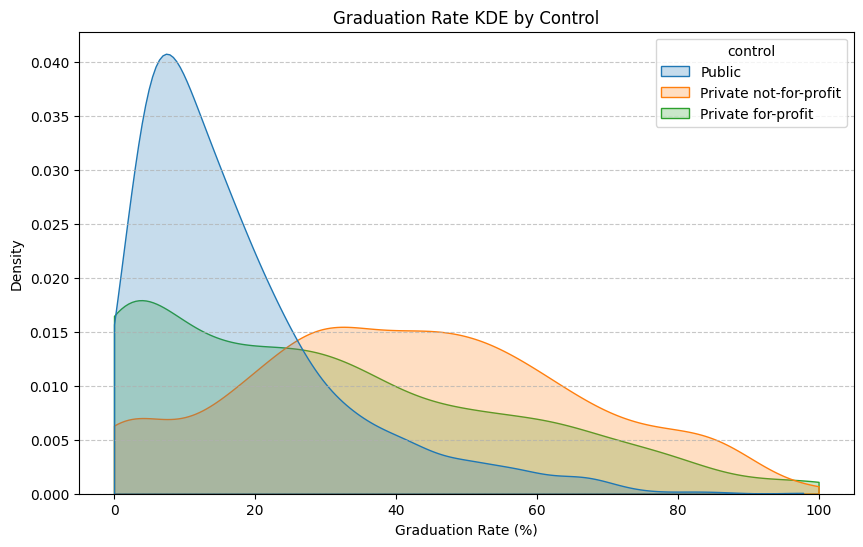

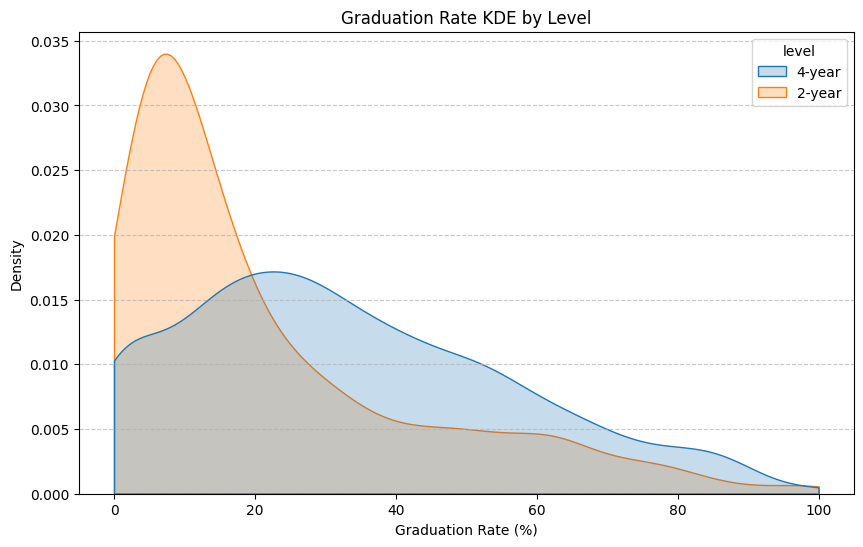

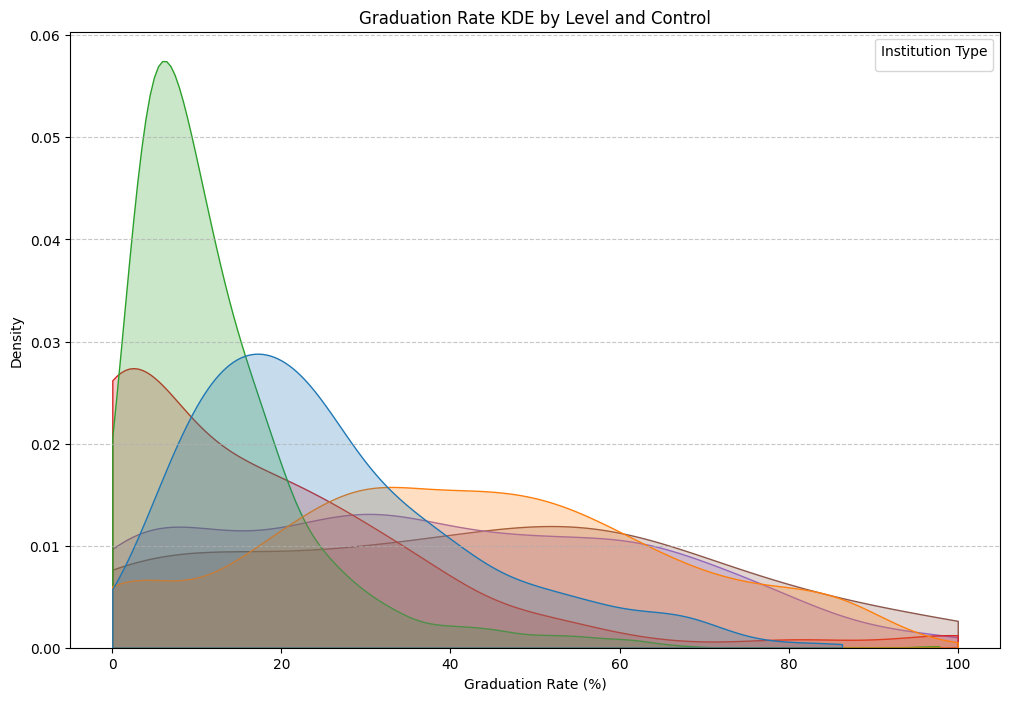

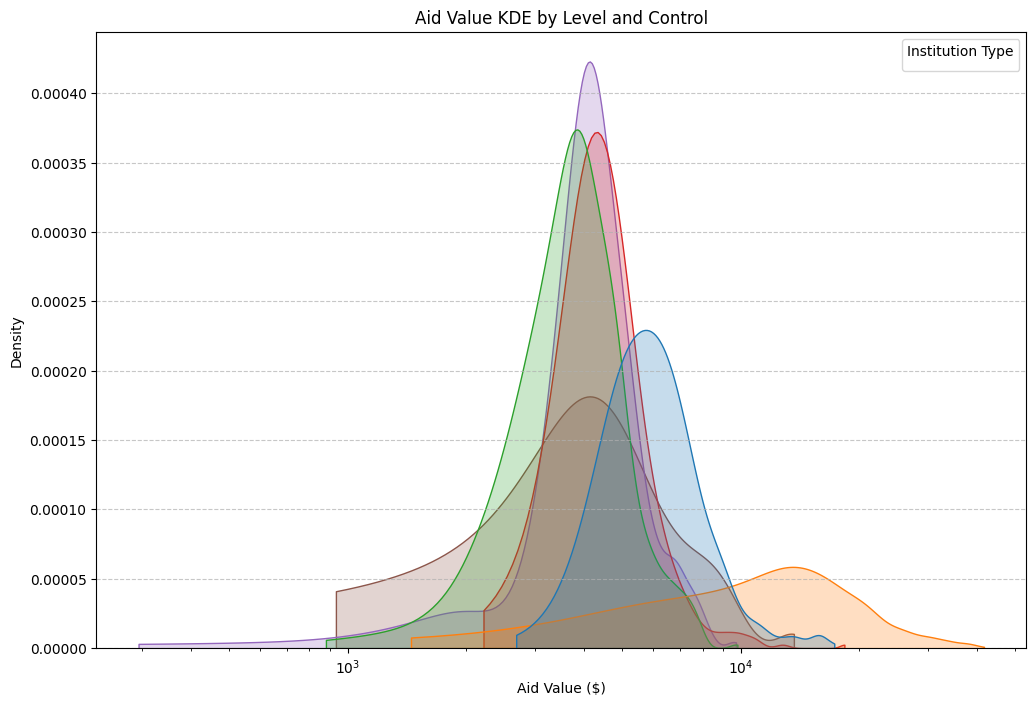

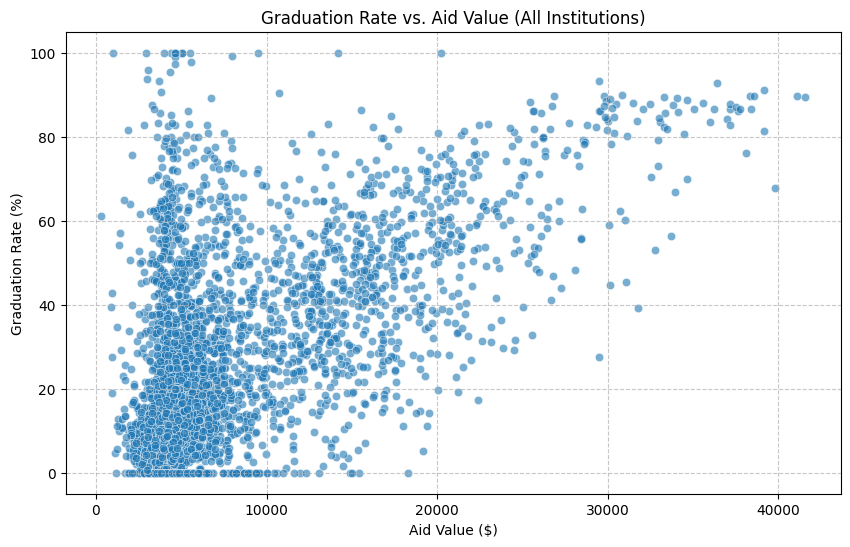

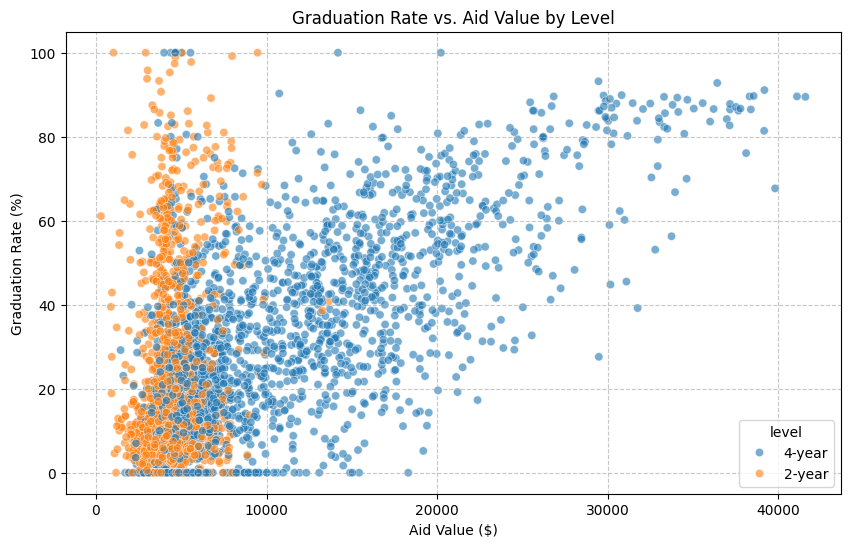

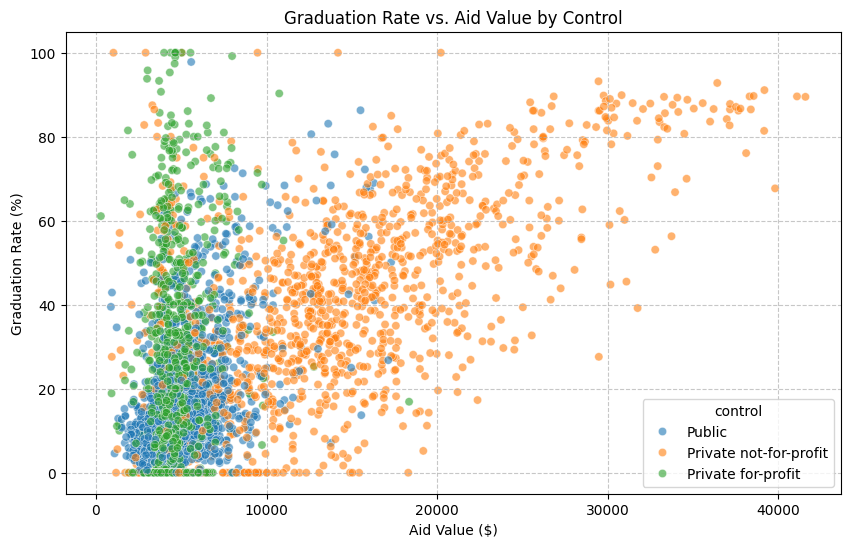

In [13]:
# Q2. Data Analysis

# 1. Load and clean the data
print("Q2.1: Loading and cleaning data...")
df = pd.read_csv('college_completion.csv')
# Drop rows with missing values in the target variable
df.dropna(subset=['grad_100_value'], inplace=True)
print("Data cleaned. Remaining rows:", len(df))
print("\n")

# 2. Histogram of `grad_100_value`.
print("Q2.2: Creating histogram of grad_100_value...")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='grad_100_value', kde=False, bins=30)
plt.title('Histogram of 100% Graduation Rates')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show() # removed plt.show()
print("\n")

# 3. KDE plot of `grad_100_value`.
print("Q2.3: Creating KDE plot of grad_100_value...")
plt.figure(figsize=(10, 6))
# Using seaborn for a quick, standard KDE plot.
sns.kdeplot(data=df, x='grad_100_value', bw_adjust=0.5, cut=0)
plt.title('Kernel Density Plot of 100% Graduation Rates')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show() # Removed plt.show()

# Comparison:
# The histogram shows the discrete counts of institutions in each bin,
# while the KDE plot provides a smooth, continuous estimate of the underlying
# probability density of the graduation rates
# The KDE plot gives a better sense of the shape of the distribution, highlighting modes and skews
# that might be less obvious in a binned histogram
print("Comparison: The KDE plot smooths the histogram, revealing a multi-modal distribution, suggesting distinct groups of institutions based on their 100% graduation rates.")
print("\n")


# 4. Grouped histograms of `grad_100_value`.
print("Q2.4: Creating grouped histograms...")
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
sns.histplot(data=df, x='grad_100_value', hue='level', multiple='stack', ax=axes[0])
axes[0].set_title('Graduation Rates by Degree Level')
axes[0].set_xlabel('Graduation Rate (%)')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='grad_100_value', hue='control', multiple='stack', ax=axes[1])
axes[1].set_title('Graduation Rates by Control')
axes[1].set_xlabel('Graduation Rate (%)')
plt.tight_layout()
# plt.show() # Removed plt.show()

print("Grouped statistical descriptions:")
print("Graduation rates by 'level':\n", df.groupby('level')['grad_100_value'].describe())
print("\nGraduation rates by 'control':\n", df.groupby('control')['grad_100_value'].describe())
print("\nBased on these plots and statistics, 4-year Private not-for-profit institutions and Flagship schools appear to have the best graduation rates on average.")
print("\n")

# 5. Grouped KDE plots. (Clarification: two separate plots)
print("Q2.5: Creating two separate grouped KDE plots...")
# First plot: grouped by 'control'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True, common_norm=False, cut=0)
plt.title('Graduation Rate KDE by Control')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show() # Removed plt.show()

# Second plot: grouped by 'level'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True, common_norm=False, cut=0)
plt.title('Graduation Rate KDE by Level')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show() # Removed plt.show()
print("\n")

# 6. Create new variable and grouped KDE plot.
print("Q2.6: Creating new variable and grouped KDE plot...")
df['levelXcontrol'] = df['level'] + ', ' + df['control']

plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True, common_norm=False, cut=0)
plt.title('Graduation Rate KDE by Level and Control')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Institution Type')
# plt.show() # Removed plt.show()

print("Grouped statistical descriptions for `levelXcontrol`:")
print(df.groupby('levelXcontrol')['grad_100_value'].describe())
print("\nFrom the plot and stats, '4-year, Private not-for-profit' institutions appear to have the highest concentration of high graduation rates.")
print("\n")

# 7. KDE plot of `aid_value`. (Clarification: single plot grouped by level and control)
print("Q2.7: Creating KDE plot of aid_value, grouped by level and control...")
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol', fill=True, common_norm=False, cut=0)
plt.title('Aid Value KDE by Level and Control')
plt.xlabel('Aid Value ($)')
plt.ylabel('Density')
plt.xscale('log') # Use a log scale for better visibility of the distribution.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Institution Type')
# plt.show() # Removed plt.show()

print("Grouped statistical descriptions for `aid_value`:")
print(df.groupby('levelXcontrol')['aid_value'].describe())
print("\nExplanation: The graph's shape is heavily skewed right with a long tail. This is because aid values are non-negative and can range from very small to very large, with a few institutions receiving significantly more aid than others. The log scale helps to show the density across this wide range. The descriptive statistics show a very large standard deviation and a large difference between the mean and the median, which are characteristic of a right-skewed distribution.")
print("\n")

# 8. Scatterplots of `grad_100_value` by `aid_value`.
print("Q2.8: Creating scatterplots...")
# First scatterplot: all data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', alpha=0.6)
plt.title('Graduation Rate vs. Aid Value (All Institutions)')
plt.xlabel('Aid Value ($)')
plt.ylabel('Graduation Rate (%)')
plt.grid(linestyle='--', alpha=0.7)
# plt.show() # Removed plt.show()
print("All Institutions: There appears to be a weak positive correlation. Institutions with more aid tend to have slightly higher graduation rates, but there's a lot of variability.")
print("\n")

# Second scatterplot: grouped by 'level'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level', alpha=0.6)
plt.title('Graduation Rate vs. Aid Value by Level')
plt.xlabel('Aid Value ($)')
plt.ylabel('Graduation Rate (%)')
plt.grid(linestyle='--', alpha=0.7)
# plt.show() # Removed plt.show()

# Third scatterplot: grouped by 'control'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control', alpha=0.6)
plt.title('Graduation Rate vs. Aid Value by Control')
plt.xlabel('Aid Value ($)')
plt.ylabel('Graduation Rate (%)')
plt.grid(linestyle='--', alpha=0.7)
# plt.show() # Removed plt.show()

print("\nDescription of grouped plots:")
print("When grouped by `level` and `control`, we see that the positive correlation is more pronounced for certain types of institutions. For example, '4-year, Private not-for-profit' institutions tend to have both higher aid values and higher graduation rates, suggesting that for these institutions, a focus on aid may be linked to better graduation outcomes. In contrast, '2-year, Public' institutions tend to have low aid values and low graduation rates, and aid does not seem to have as strong of a relationship with graduation rates.")
print("The positive relationship between aid and graduation rates seems most evident for 4-year institutions, particularly those that are private not-for-profit or public.")